# pycbf - Basic example

This notebook roughly simulates channel data and beamforms it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import ctypes as ct
from pycbf import CPUBeamformer
from scipy.signal import hilbert

In [69]:
def linterp(x0:float, dx:float, nx:int, y, xout, fill = np.nan):
    yout = np.zeros(xout.shape)
    xn = x0 + dx * (nx-1)
    for ii in range(xout.size):
        if xout[ii] == xn: 
            yout[ii] = y[nx-1]
            continue
        elif (xout[ii] < x0) or (xout[ii] > xn): 
            yout[ii] = fill
            continue

        ixo = int((xout[ii]-x0)/dx)

        xi = x0 + ixo * dx
        delta = (xout[ii] - xi)/dx

        yout[ii] = (1 - delta) * y[ixo] + delta * y[ixo+1]

    return yout

y = np.exp(-(np.arange(0, 16.00001, 1)/4 - 2)**2) * np.sin(2*np.pi*np.arange(0, 16.00001, 1)/4)
x0 = 0
dx = 1
nx = len(y)

xout = np.arange(-16, 16+16, 0.1)
yout_lin = linterp(x0, dx, nx, y, xout)



In [67]:
def cubeterp(x0:float, dx:float, nx:int, y, xout, fill = np.nan):
    yout = np.zeros(xout.shape)
    xn = x0 + dx * (nx-1)
    for ii in range(xout.size):
        if xout[ii] == xn: 
            yout[ii] = y[nx-1]
            continue
        elif (xout[ii] < x0) or (xout[ii] > xn): 
            yout[ii] = fill
            continue

        ixo = int((xout[ii]-x0)/dx)

        if ixo == 0:
            mp0  = y[ixo+1] - y[ixo]
            mp1 = y[ixo+2] - y[ixo+1]
            sp0 = mp0
            sp1 = (mp0 + mp1)/2

        elif ixo == 1:
            mm1 = y[ixo]   - y[ixo-1]
            mp0  = y[ixo+1] - y[ixo]
            mp1 = y[ixo+2] - y[ixo+1]
            mp2 = y[ixo+3] - y[ixo+2]

            sp0 = (mp0 + mp1)/2

            w0 = np.abs(mp2 - mp1) + np.abs(mp2 + mp1)/2
            w1 = np.abs(mp0 - mm1) + np.abs(mp0 + mm1)/2
            if w0 + w1 == 0: sp1 = (mp0 + mp1)/2
            else: sp1 = (w0 * mp0 + w1*mp1) / (w0 + w1)

        elif ixo == nx-3:
            mm2 = y[ixo-1] - y[ixo-2]
            mm1 = y[ixo]   - y[ixo-1]
            mp0  = y[ixo+1] - y[ixo]
            mp1 = y[ixo+2] - y[ixo+1]

            w0 = np.abs(mp1 - mp0) + np.abs(mp1 + mp0)/2
            w1 = np.abs(mm1 - mm2) + np.abs(mm1 + mm2)/2
            if w0 + w1 == 0: sp0 = (mm1 + mp0)/2
            else: sp0 = (w0 * mm1 + w1*mp0) / (w0 + w1)

            sp1 = (mp0 + mp1)/2

        elif ixo == nx-2:
            mm1 = y[ixo]   - y[ixo-1]
            mp0 = y[ixo+1] - y[ixo]

            sp0 = (mm1+mp0)/2
            sp1 = mp0
        else:
            mm2 = y[ixo-1] - y[ixo-2]
            mm1 = y[ixo]   - y[ixo-1]
            mp0  = y[ixo+1] - y[ixo]
            mp1 = y[ixo+2] - y[ixo+1]
            mp2 = y[ixo+3] - y[ixo+2]

            w0 = np.abs(mp1 - mp0) + np.abs(mp1 + mp0)/2
            w1 = np.abs(mm1 - mm2) + np.abs(mm1 + mm2)/2
            if w0 + w1 == 0: sp0 = (mm1 + mp0)/2
            else: sp0 = (w0 * mm1 + w1*mp0) / (w0 + w1)

            w0 = np.abs(mp2 - mp1) + np.abs(mp2 + mp1)/2
            w1 = np.abs(mp0 - mm1) + np.abs(mp0 + mm1)/2
            if w0 + w1 == 0: sp1 = (mp0 + mp1)/2
            else: sp1 = (w0 * mp0 + w1*mp1) / (w0 + w1)

        a = y[ixo]
        b = sp0
        c = (3*mp0 - 2*sp0 - sp1)/dx
        d = (sp0 + sp1 - 2*mp0)/dx**2

        delta = xout[ii] - (x0 + dx * ixo)

        yout[ii] = a + b * delta + c * delta**2 + d * delta**3

    return yout


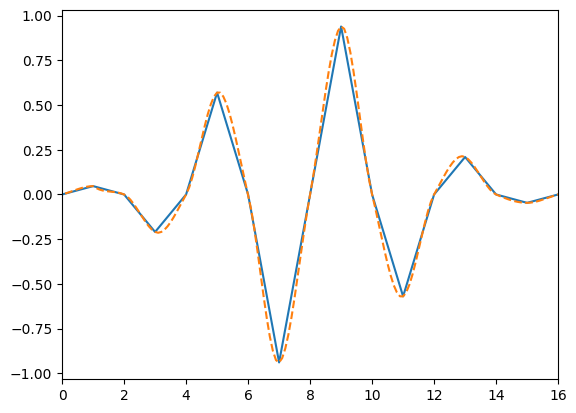

In [75]:
yout_cub = cubeterp(x0, dx, nx, y, xout, fill=0)

plt.figure()
plt.plot(x0 + dx * np.arange(nx), y)
#plt.plot(xout, yout_lin, linestyle='--')
plt.plot(xout, yout_cub, linestyle='--')
plt.xlim(0, 16)
plt.show()